<a href="https://colab.research.google.com/github/KevanMehta/Hindi-Text-Summarisation/blob/main/absractive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
nRowsRead = 10000 # specify 'None' if want to read whole file
# test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/archive/test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 2 columns


# New Section

In [ ]:
df1.head(5)

,headline,article
0,"पठानकोट पहुंचे PM मोदी, एयरबेस का जायजा ले बॉर...",प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन ने देशवासियों को समर्पित किया अपना दोहरा शतक,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,एनआईए करेगी छत्तीसगढ़ में सुरक्षा खामियों की ज...,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,सीधी बात: शाह बोले- हमारा बस चलता तो अब तक मं...,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,"ऋषभ पंत के पास यूनिक टैलेंट, उसके साथ छेड़छाड़ न...",ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


In [ ]:
nRowsRead = 100000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/drive/MyDrive/archive/train.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'train.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 2 columns


In [ ]:
df.head(5)

,headline,article
0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2,UN में पाकिस्तान की राजदूत मलीहा लोधी ने कराई ...,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3,38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...,पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4,13 अगस्त 2011: दिनभर की बड़ी खबरें पढ़ें,"देश, दुनिया, महानगर, खेल, आर्थिक और बॉलीवुड मे..."


In [ ]:
df.describe()

,headline,article
count,99992,100000
unique,99510,99987
top,Tech Wrap: यहां जानें आज की 5 बड़ी खबरें,हमारे साझेदार 'अनरियल टाइम्स' की खास व्यंग्यात...
freq,159,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  99992 non-null   object
 1   article   100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text
  

In [ ]:
print(preprocess_tokenize('''वहीं दूसरी ओर समीर वानखेड़े की पत्नी क्रांति रेडकर ने अपनी शादी, पूजा और अन्य कार्यक्रमों की तस्वीरें पोस्ट कर कहा है कि समीर वानखेड़े हिंदू परंपराओं को मानते हैं.

इन मामलों की सुनवाई बांबे हाईकोर्ट में भी हो रही है. ऐसे में सवाल यही है कि नवाब मलिक और क्रांति रेडकर लगातार सोशल मीडिया प्लेटफ़ॉर्म पर सबूत क्यों पेश कर रहे हैं जबकि मामला अदालत में विचाराधीन है?

नवाब मलिक बार-बार यह दावा क्यों कर रहे हैं कि समीर वानखेड़े मुसलमान हैं? मलिक इससे वास्तव में क्या हासिल करना चाहते हैं? समीर वानखेड़े के मुसलमान साबित होने पर क्या परिणाम होंगे?

इस स्टोरी में इन्हीं सवालों के जवाब तलाशने की कोशिश की गई है.'''))

वहीं दूसरी ओर समीर वानखेड़े की पत्नी क्रांति रेडकर ने अपनी शादी पूजा और अन्य कार्यक्रमों की तस्वीरें पोस्ट कर कहा है कि समीर वानखेड़े हिंदू परंपराओं को मानते हैं इन मामलों की सुनवाई बांबे हाईकोर्ट में भी हो रही है ऐसे में सवाल यही है कि नवाब मलिक और क्रांति रेडकर लगातार सोशल मीडिया प्लेटफ़ॉर्म पर सबूत क्यों पेश कर रहे हैं जबकि मामला अदालत में विचाराधीन है नवाब मलिक बार-बार यह दावा क्यों कर रहे हैं कि समीर वानखेड़े मुसलमान हैं मलिक इससे वास्तव में क्या हासिल करना चाहते हैं समीर वानखेड़े के मुसलमान साबित होने पर क्या परिणाम होंगे इस स्टोरी में इन्हीं सवालों के जवाब तलाशने की कोशिश की गई है 


In [ ]:
import pandas as pd
import torch
import random
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
train_data_src = df['headline']
train_data_trg = df['article']

In [ ]:
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are headlines
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg] # these are articles


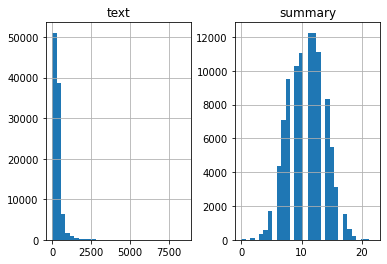

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_trg:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_src:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
df['Text_Cleaned'] = tokenized_corpus_trg  
print("::::: Text_Cleaned :::::")
print(df['Text_Cleaned'][0:5], "\n")


df['Summary_Cleaned'] =  tokenized_corpus_src 
print("::::: Summary :::::")
print(df['Summary_Cleaned'][0:5], "\n")

corpus = list(df['Text_Cleaned'])

::::: Text_Cleaned :::::
0    दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1    जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2    पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3    पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4    देश दुनिया महानगर खेल आर्थिक और बॉलीवुड में क्...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0     दिल्ली में डीजल टैक्सियों पर बैन से मुश्किल म...
1    जॉर्डन राष्ट्रपति मुखर्जी ने करोड़ डॉलर के संय...
2     में पाकिस्तान की राजदूत मलीहा लोधी ने कराई फज...
3     देशों में पीएम नरेंद्र मोदी बायोपिक को रिलीज ...
4                      अगस्त दिनभर की बड़ी खबरें पढ़ें
Name: Summary_Cleaned, dtype: object 



In [ ]:
print(df['Text_Cleaned'][0])

दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को बंद करने के फैसले के बाद हजारों टैक्सी ड्राइवरों की रोजी रोटी पर तो असर पड़ा ही है लेकिन अब दिल्ली पर एक और नई मुसीबत आ गई है चुनाव आयोग राजधानी के वार्ड में उपचुनाव करवा रहा है लेकिन चुनावों से दो हफ्ते पहले चुनाव आयोग में कामकाज ठप्प हो गया है कमीशन ने किराए पर ली थी डीजल गाड़ियांदरअसल कमीशन ने लगभग सौ गाड़ियां चुनाव के कामकाज को करने के लिए किराए पर लीं जिनमें सभीडीज़ल से चलने वाली टैक्सीथी इन्हीं टैक्सियों से चुनाव अधिकारी से लेकर चुनावों का जिम्मा संभालने वाले बाकी कर्मचारी भी एक जगह से दूसरी जगह आते जाते थे अचानक चुनावों से ठीक पहले आई इस परेशानी ने दिल्ली चुनाव आयोग का कामकाज ही ठप्प कर दिया है रियायत के लिए की जा सकती है मांगदिल्ली के राज्य चुनाव अधिकारी राकेश मेहता ने इस मुश्किल का रास्ता निकालने के लिए मंगलवार को दिल्ली के पुलिस कमिश्नर और ट्रांसपोर्ट कमिश्नर की बैठक बुलाई है इस बैठक में राज्य चुनाव आयुक्त मई को होने वाले चुनावों को लेकरगाड़ियों की उपलब्धताको लेकर पुलिस और सरकार से समाधान निकालने के लिए भी कहेंगे चुनाव आयोग इन दो

In [ ]:
print(df['Summary_Cleaned'][0])

 दिल्ली में डीजल टैक्सियों पर बैन से मुश्किल में पड़ा चुनाव आयोग


In [ ]:
text_count = []
summary_count = []

for sent in df['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in df['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [ ]:
graph_df['text'].describe()

count    100000.000000
mean        345.238200
std         308.739341
min           0.000000
25%         195.000000
50%         280.000000
75%         395.000000
max        8505.000000
Name: text, dtype: float64

In [ ]:
graph_df['summary'].describe()

count    100000.00000
mean         10.84903
std           2.97927
min           0.00000
25%           9.00000
50%          11.00000
75%          13.00000
max          22.00000
Name: summary, dtype: float64

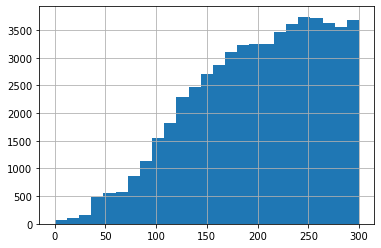

In [ ]:
graph_df['text'].hist(bins = 25, range=(0, 300))
plt.show()

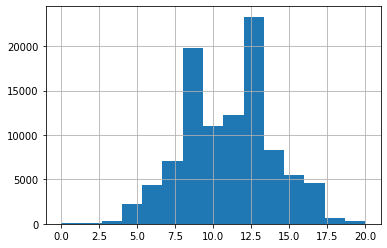

In [ ]:
graph_df['summary'].hist(bins = 15, range=(0, 20))
plt.show()

In [ ]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 300:
        count = count + 1
print(count / len(graph_df['text']))

0.55835


In [ ]:
count = 0
for i in graph_df['summary']:
    if i > 1 and i <= 16:
        count = count + 1
print(count / len(graph_df['summary']))

0.97472


In [ ]:
max_text_len = 300
max_summary_len = 16

In [ ]:
cleaned_text = np.array(df['Text_Cleaned'])
cleaned_summary = np.array(df['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len ):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
post_pre.shape

(54952, 2)

In [ ]:
post_pre

,text,summary
0,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...,sostok दिल्ली में डीजल टैक्सियों पर बैन से मु...
1,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...,sostok में पाकिस्तान की राजदूत मलीहा लोधी ने ...
2,पाकिस्तान के तेज गेंदबाजहसन अलीने कहा किएशिया ...,sostok एशिया कप से पहले बोला बॉलर- हार के बाद ...
3,महाराष्ट्र के अहमदनगर एमआईडीसी में फोर्ट शोरूम...,sostok शोरूम मालिक से करोड़ की फिरौती मांगा सा...
4,आपने शानदार पार्टी के साथ का आगाज तो कर लिया ह...,sostok जानें- इस साल कब-कब होंगे ड्राई-डे देख...
...,...,...
54947,कई लोग ऑफिस में काम के अधिक प्रेशर और जल्दी का...,sostok लंबे समय तक बैठे रहते हैं सेहत को होगा ...
54948,जाने-माने कॉमेडियन कपिल शर्मा के आने वाले शो क...,sostok द कपिल शर्मा शो के प्रोमो को अब तक देख...
54949,टीवी टीआरपी पर टॉप पर रहने वाले शो कुंडली भाग्...,sostok टॉवल डांस कर रही थी कुंडली भाग्य की एक्...
54950,दिल्ली के द्वारका सेक्टर- इलाके में संदिग्ध हा...,sostok दिल्ली में संदिग्ध हालत में मिली लड़की ...


In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

# train test split
x_tr,x_test,y_tr,y_test = train_test_split(np.array(post_pre['text']),
                                         np.array(post_pre['summary']),
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)
# train validation split
x_tr,x_val,y_tr,y_val = train_test_split(x_tr,
                                         y_tr,
                                         test_size = 0.2,
                                         random_state = 0,
                                         shuffle = True)

In [ ]:
x_tr.shape

(35168,)

In [ ]:
x_test.shape

(10991,)

In [ ]:
x_val.shape

(8793,)

In [ ]:
# Tokenize text to get the vocab count
#prepare a tokenizer for training data
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(list(x_tr))


#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
#one-hot representation

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
        
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 77.17079038460308
Total Coverage of rare words: 2.1891748297952827


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

In [ ]:

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 35681


In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.40125457836905
Total Coverage of rare words: 7.2548202671110795


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words = tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 6319


In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(35168, 35168)

In [ ]:
from tensorflow.keras.backend import clear_session
import tensorflow as tf
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [ ]:
y_tr[1]

array([   1, 1836,    3, 1204,  302,  318,   10,  454, 2017, 2454,    5,
       1627,   95,  162,    2,    0], dtype=int32)

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)


In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
print(f"Size of vocabulary from the w2v model = {x_voc}")
clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder = Bidirectional(LSTM(latent_dim, return_state=True,return_sequences=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(enc_emb)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=encoder_states)

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 35681
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 100)     3568100     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 300, 600),   962400      ['embedding[0][0]']              
                                 (None, 300),   

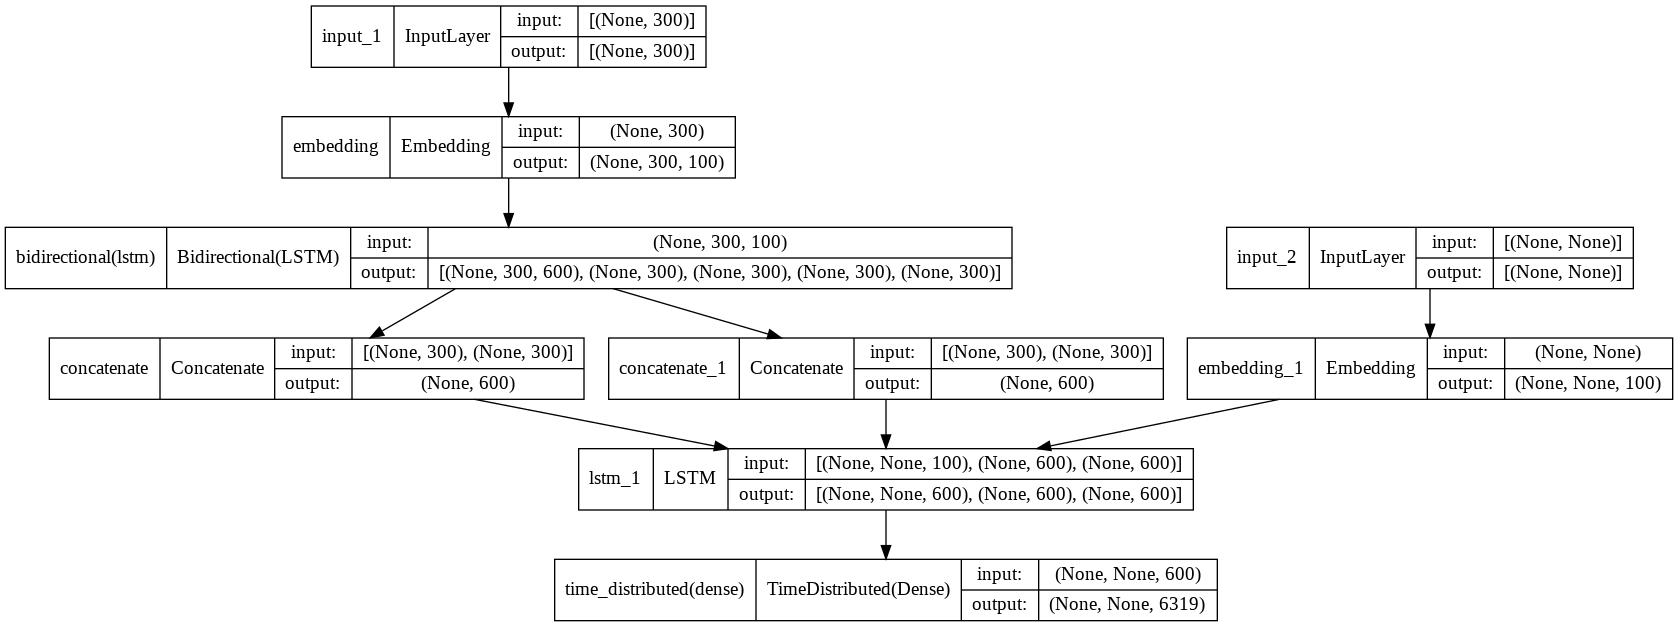

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
275/275 [==============================] - 127s 426ms/step - loss: 4.4897 - val_loss: 4.1264
Epoch 2/50
275/275 [==============================] - 116s 422ms/step - loss: 4.0585 - val_loss: 3.8763
Epoch 3/50
275/275 [==============================] - 116s 423ms/step - loss: 3.8018 - val_loss: 3.6633
Epoch 4/50
275/275 [==============================] - 116s 422ms/step - loss: 3.5902 - val_loss: 3.5317
Epoch 5/50
275/275 [==============================] - 116s 422ms/step - loss: 3.4199 - val_loss: 3.4067
Epoch 6/50
275/275 [==============================] - 116s 423ms/step - loss: 3.2791 - val_loss: 3.3424
Epoch 7/50
275/275 [==============================] - 116s 422ms/step - loss: 3.1538 - val_loss: 3.2688
Epoch 8/50
275/275 [==============================] - 116s 423ms/step - loss: 3.0428 - val_loss: 3.2392
Epoch 9/50
275/275 [==============================] - 116s 424ms/step - loss: 2.9410 - val_loss: 3.1942
Epoch 10/50
275/275 [==============================] - 116s 422m

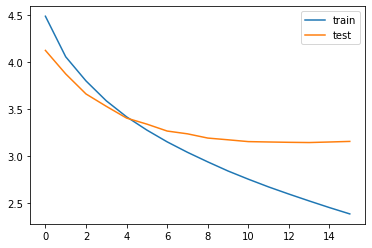

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [ ]:
print(reverse_source_word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 100)    631900      ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 600)]        0           []                               
                                                                                            

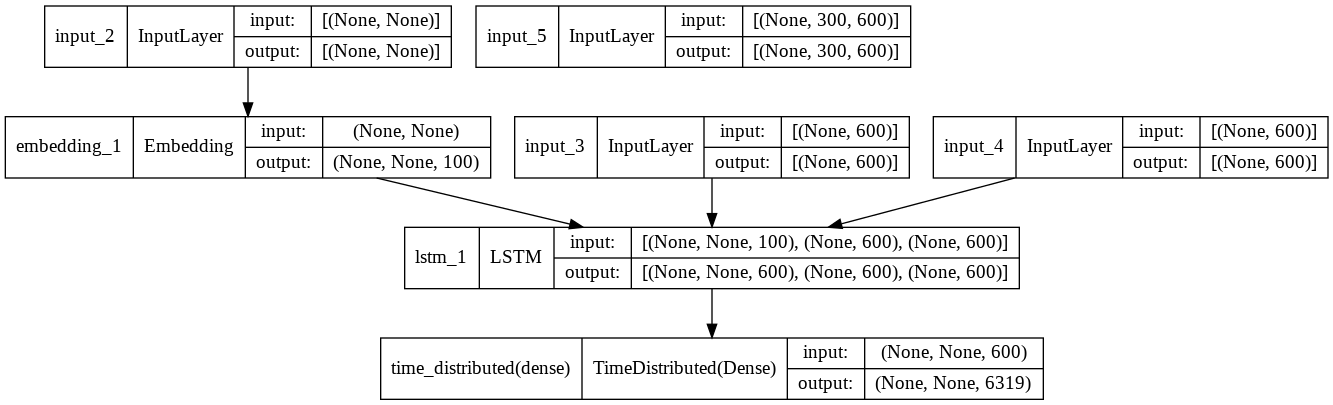

In [ ]:
tf.keras.utils.plot_model(
    decoder_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: कुटीर लघु और मध्यम उद्यमों को कर्ज देने के अनोखे तरीके तलाशने के लिए रिजर्व बैंक का पुणे स्थित कृषि बैंकिंग महाविद्यालय बैंकों के लिए एक प्रतियोगिता आयोजित करेगा इस प्रतियोगिता का विषय है केस स्टडी एक एमएसएमई को नए ढंग से कर्ज आबंटन कर्ज देने के नए तरीकों पर केस ने एक सर्कुलर जारी कर कहा प्रतियोगिता आयोजित करने का उद्देश्य बैंकों को ऐसे मामलों का अध्ययन करने के लिए प्रोत्साहित करना है जहां कुटीर लघु और मझोले उद्यमों को अनोखे तरीके से कर्ज दिया गया हो और ऐसे मामलों को लेकर दूसरे बैंकों को भी संवेदनशील बनाया जा सके ये कर्मचारी ले सकते हैं बैंक ने कहा कि बैंकों के कर्मचारी सदस्य जिसमें बैंकों के प्रशिक्षण प्रतिष्ठानों के फैकल्टी सदस्य क्षेत्रीय ग्रामीण बैंकों राज्य सहकारी बैंकों और शहरी सहकारी बैंकोंके सदस्य शामिल हैं इस प्रतियोगिता में हिस्सा ले सकते हैं अंग्रेजी या हिंदी भाषा का अलावा इन बैंकों के प्रशिक्षण प्रतिष्ठानों से फैकल्टी सदस्य और गैर बैंकिंग वित्तीय कंपनियों के कर्मचारी सदस्य भी इस प्रतियोगिता में हिस्सा ले सकते हैं आरबीआई ने स्टडी अंग्रेजी या हिंदी जनवरी तक मांगे हैं 

In [ ]:
from __future__ import division
from itertools import chain


def get_unigram_count(tokens):
    count_dict = dict()
    for t in tokens:
        if t in count_dict:
            count_dict[t] += 1
        else:
            count_dict[t] = 1

    return count_dict


class Rouge:
    beta = 1

    @staticmethod
    def my_lcs_grid(x, y):
        n = len(x)
        m = len(y)

        table = [[0 for i in range(m + 1)] for j in range(n + 1)]

        for j in range(m + 1):
            for i in range(n + 1):
                if i == 0 or j == 0:
                    cell = (0, 'e')
                elif x[i - 1] == y[j - 1]:
                    cell = (table[i - 1][j - 1][0] + 1, '\\')
                else:
                    over = table[i - 1][j][0]
                    left = table[i][j - 1][0]

                    if left < over:
                        cell = (over, '^')
                    else:
                        cell = (left, '<')

                table[i][j] = cell

        return table

    @staticmethod
    def my_lcs(x, y, mask_x):
        table = Rouge.my_lcs_grid(x, y)
        i = len(x)
        j = len(y)

        while i > 0 and j > 0:
            move = table[i][j][1]
            if move == '\\':
                mask_x[i - 1] = 1
                i -= 1 
                j -= 1
            elif move == '^':
                i -= 1
            elif move == '<':
                j -= 1

        return mask_x

    @staticmethod
    def rouge_l(cand_sents, ref_sents):
        lcs_scores = 0.0
        cand_unigrams = get_unigram_count(chain(*cand_sents))
        ref_unigrams = get_unigram_count(chain(*ref_sents))
        for cand_sent in cand_sents:
            cand_token_mask = [0 for t in cand_sent]
            cand_len = len(cand_sent)
            for ref_sent in ref_sents:
                # aligns = []
                # Rouge.lcs(ref_sent, cand_sent, aligns)
                Rouge.my_lcs(cand_sent, ref_sent, cand_token_mask)

                # for i in aligns:
                #     ref_token_mask[i] = 1
            # lcs = []
            cur_lcs_score = 0.0
            for i in range(cand_len):
                if cand_token_mask[i]:
                    token = cand_sent[i]
                    if cand_unigrams[token] > 0 and ref_unigrams[token] > 0:
                        cand_unigrams[token] -= 1
                        ref_unigrams[token] -= 1
                        cur_lcs_score += 1

                        # lcs.append(token)

            # print ' '.join(lcs)

            lcs_scores += cur_lcs_score

        # print "lcs_scores: %d" % lcs_scores
        ref_words_count = sum(len(s) for s in ref_sents)
        # print "ref_words_count: %d" % ref_words_count
        cand_words_count = sum(len(s) for s in cand_sents)
        # print "cand_words_count: %d" % cand_words_count

        precision = lcs_scores / cand_words_count
        recall = lcs_scores / ref_words_count
        f_score = (1 + Rouge.beta ** 2) * precision * recall / (recall +
                                                                Rouge.beta ** 2 * precision + 1e-7) + 1e-6  # prevent underflow
        return precision, recall, f_score

    # @staticmethod
    # def rouge_2(cand_sents, ref_sents):
    #     cand_bigram_counts = get_bigram_counts(cand_sents)
    #     ref_bigram_counts = get_bigram_counts(ref_sents)

In [ ]:
count=20
sum_F=12.346860213552002
avg_F=0.3527674346729143

In [ ]:
r = Rouge()

system_generated_summary = seq2summary(y_tr[9])
manual_summmary = decode_sequence(x_tr[9].reshape(1,max_text_len))

[precision, recall, f_score] = r.rouge_l([system_generated_summary], [manual_summmary])

print("Precision is :"+str(precision)+"\nRecall is :"+str(recall)+"\nF Score is :"+str(f_score))

sum_F=sum_F+f_score
avg_F=sum_F/count

print("Sum of ROUGE Score: ",sum_F)
print("Average ROUGE Score = ", avg_F)



Precision is :0.6060606060606061
Recall is :0.5555555555555556
F Score is :0.5797110950220584
Sum of ROUGE Score:  13.50628240359612
Average ROUGE Score =  0.6753141201798061


In [ ]:
input1 = input("Enter the article: ")
'''preprocess_tokenize(input1)
xt_tokenizer = Tokenizer() 

xt_tokenizer.fit_on_texts(input1)
input1_seq   =   xt_tokenizer.texts_to_sequences(input1)'''

decode_sequence(input1)

KeyboardInterrupt: ignored